# EDA Revision

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import sklearn as sk
from scipy import stats

In [388]:
# data_import
testdata = sns.load_dataset("titanic")

In [389]:
# bigger picture (Composition)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [390]:
testdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [391]:
# unique values

testdata["survived"].unique()

# count of unique values

array([0, 1], dtype=int64)

In [392]:
# THIS IS HOW YOU SEE THE CATEGORIES WITHIN A COLUMN
testdata["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [393]:
testdata["age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [394]:
testdata["age"].nunique()

88

In [395]:
testdata["fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [396]:
testdata["fare"].nunique()

248

In [397]:
testdata["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [398]:
testdata.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [399]:
testdata["sibsp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [400]:
testdata["parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<Axes: xlabel='age', ylabel='Count'>

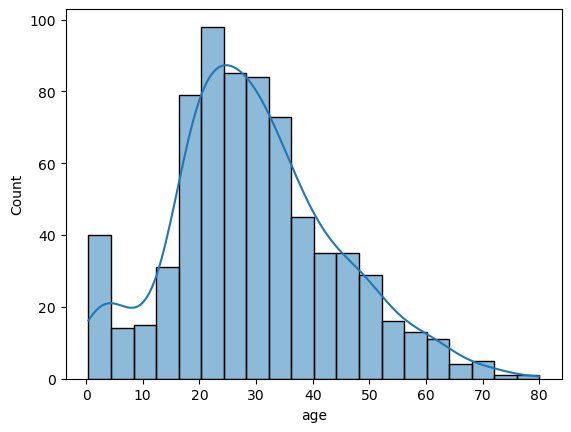

In [401]:
sns.histplot(testdata, x=testdata["age"], kde=1)

In [402]:
testdata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [403]:
testdata["age"] = testdata["age"].fillna(testdata["age"].mean())

In [404]:
testdata.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [405]:
testdata.drop(columns="deck", inplace=True)

In [406]:
testdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [407]:
testdata["embarked"] = testdata.embarked.fillna(value=testdata["embarked"].mode()[0])

In [ ]:
testdata["embark_town"] = testdata.embarked.fillna(
    value=testdata["embark_town"].mode()[0]
)

In [409]:
testdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [410]:
import scipy.stats as stats

stats.shapiro(testdata["age"])

ShapiroResult(statistic=0.958819577980981, pvalue=3.969248314522851e-15)

<Axes: xlabel='age', ylabel='Count'>

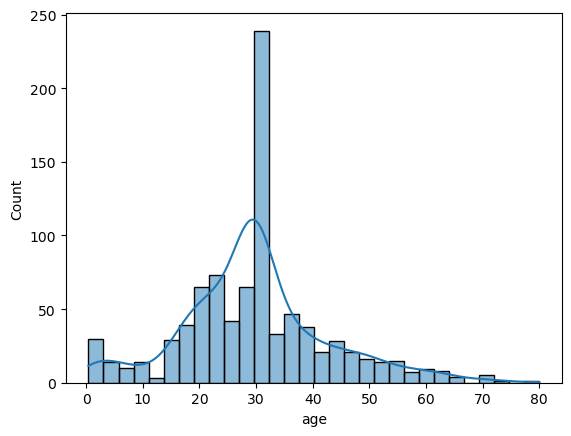

In [411]:
sns.histplot(testdata, x="age", kde=1)

In [412]:
stats.shapiro(testdata["fare"])

ShapiroResult(statistic=0.5218913010396559, pvalue=1.0840444395829658e-43)

<Axes: xlabel='fare', ylabel='Count'>

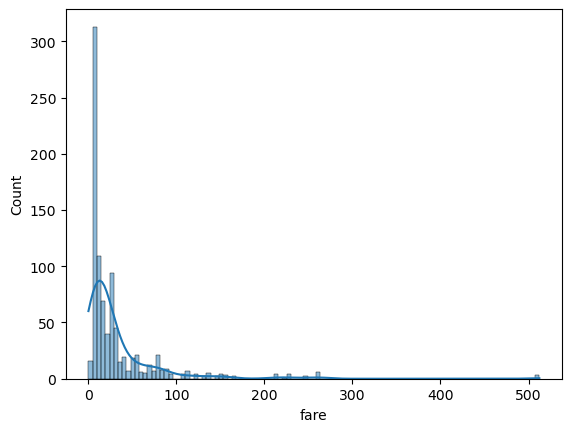

In [413]:
sns.histplot(testdata, x="fare", kde=1)

<Axes: ylabel='fare'>

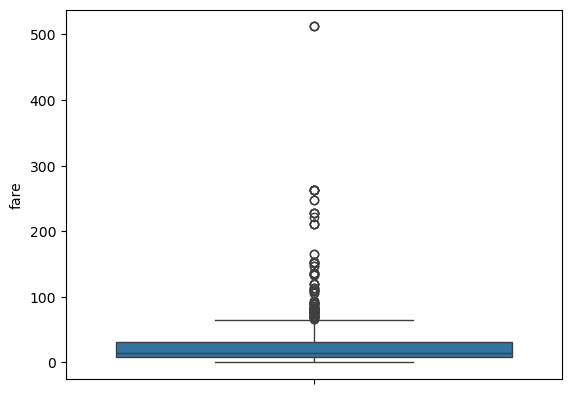

In [414]:
sns.boxplot(testdata["fare"])

<Axes: xlabel='class', ylabel='fare'>

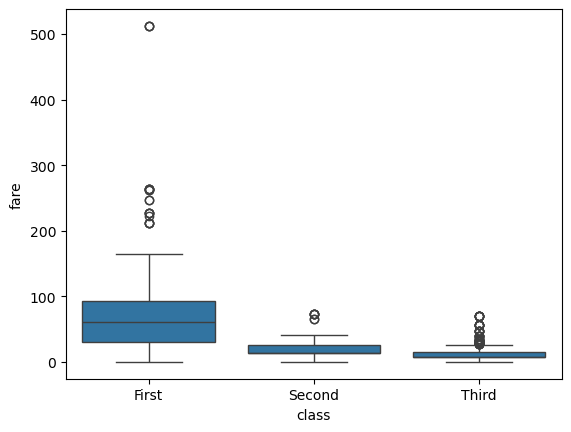

In [415]:
sns.boxplot(data=testdata, x="class", y="fare")

In [ ]:
testdata_first = testdata[testdata["class"] == "First"]
testdata_second = testdata[testdata["class"] == "Second"]
testdata_third = testdata[testdata["class"] == "Third"]

In [ ]:
stats.shapiro(testdata_first["fare"])

ShapiroResult(statistic=0.7184011166151456, pvalue=7.556208132385032e-19)

In [ ]:
stats.shapiro(testdata_second["fare"])

ShapiroResult(statistic=0.7785055068881875, pvalue=2.1134411017545675e-15)

In [ ]:
stats.shapiro(testdata_third["fare"])

ShapiroResult(statistic=0.6183852077353742, pvalue=1.5994737003197998e-31)

In [420]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# IQR

Q1 = testdata_first["fare"].quantile(0.25)
Q3 = testdata_first["fare"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

testdata_outliers_removed = testdata_first[
    (testdata_first["fare"] > lower_limit) & (testdata_first["fare"] < upper_limit)
]
testdata_outliers_removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,S,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,S,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,S,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,S,yes,True


<Axes: xlabel='fare', ylabel='Count'>

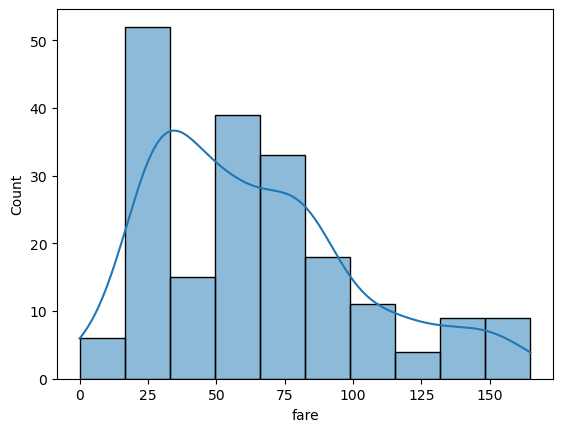

In [ ]:
sns.histplot(testdata_outliers_removed["fare"], kde=1)

In [ ]:
stats.shapiro(testdata_outliers_removed["fare"])

ShapiroResult(statistic=0.9243669055626075, pvalue=1.6046327508760568e-08)

In [ ]:
# IQR

Q1 = testdata_second["fare"].quantile(0.25)
Q3 = testdata_second["fare"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

testdata_outliers_removed1 = testdata_second[
    (testdata_second["fare"] > lower_limit) & (testdata_second["fare"] < upper_limit)
]
testdata_outliers_removed1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,C,yes,False
15,1,2,female,55.000000,0,0,16.0000,S,Second,woman,False,S,yes,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,S,yes,True
20,0,2,male,35.000000,0,0,26.0000,S,Second,man,True,S,no,True
21,1,2,male,34.000000,0,0,13.0000,S,Second,man,True,S,yes,True


<Axes: xlabel='fare', ylabel='Count'>

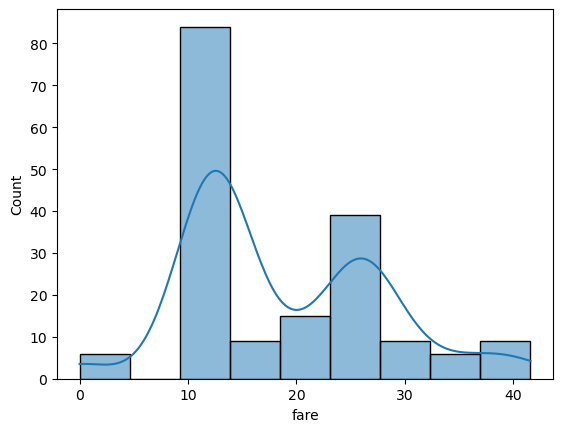

In [ ]:
sns.histplot(testdata_outliers_removed1["fare"], kde=1)

In [ ]:
# IQR

Q1 = testdata_third["fare"].quantile(0.25)
Q3 = testdata_third["fare"].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

testdata_outliers_removed2 = testdata_third[
    (testdata_third["fare"] > lower_limit) & (testdata_third["fare"] < upper_limit)
]
testdata_outliers_removed2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,S,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,S,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,S,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Q,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,S,no,False


<Axes: xlabel='fare', ylabel='Count'>

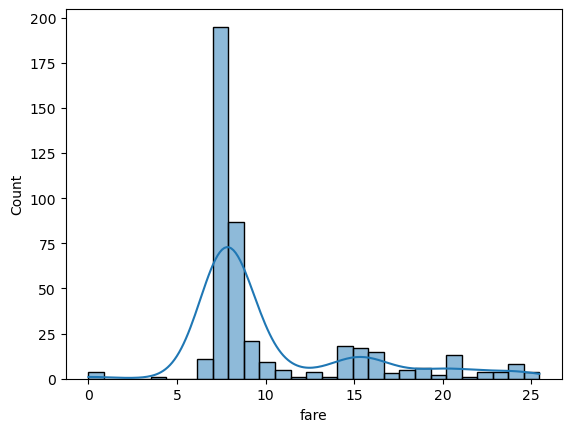

In [ ]:
sns.histplot(testdata_outliers_removed2["fare"], kde=1)

In [428]:
testdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
testdata["fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
# subset

testdata["fare"] = np.log1p(testdata["fare"])
testdata.head()

ShapiroResult(statistic=0.8224941166314814, pvalue=2.964343321813538e-30)

In [ ]:
# method
stats.shapiro(testdata["fare"])

<Axes: xlabel='fare', ylabel='Count'>

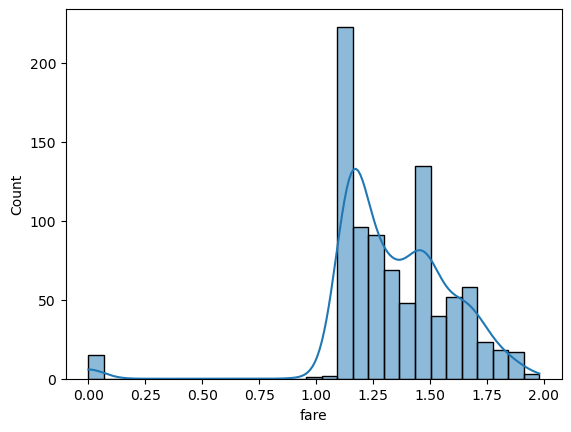

In [ ]:
# make plot
sns.histplot(testdata["fare"], kde=1)

In [ ]:
# normal distribution test

In [ ]:
testdata["fare"].unique()

array([1.13469128, 1.66403842, 1.15966233, 1.60760307, 1.16401442,
       1.17769844, 1.60295579, 1.40963136, 1.25160623, 1.48981359,
       1.35417518, 1.46232963, 1.49834834, 1.15716164, 1.34370344,
       1.48282094, 1.29172467, 1.37230673, 1.13371501, 1.45764638,
       1.16329573, 1.52547184, 1.49912572, 1.88341892, 1.15804764,
       1.15863414, 1.4719264 , 1.79075383, 1.15343303, 1.23615352,
       1.69026118, 1.60347857, 1.1338793 , 1.2541472 , 1.20865925,
       1.40879982, 1.55843213, 1.33588499, 1.41620461, 1.36962034,
       1.54882149, 1.15522943, 1.6777003 , 1.63759856, 1.47215957,
       1.5829123 , 1.68537049, 1.69312731, 1.47335277, 1.33179446,
       1.16772178, 1.18425541, 1.66974232, 1.31851882, 1.61972718,
       1.14979936, 1.48187664, 1.28116607, 1.19470552, 1.20937079,
       1.15478159, 1.58376767, 1.34138869, 1.51863872, 1.6350965 ,
       1.40402014, 1.52035901, 1.64180169, 1.42984555, 1.67903635,
       1.18399244, 1.15433291, 1.44098563, 1.21842534, 1.31858

In [433]:
testdata.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64